In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.style.use('bmh')

In [36]:
df_complete = pd.read_csv(r'/scraping_proyecto_integrador/TSSSM5/csv_2000_to_2019.csv')
print(df_complete)

      Unnamed: 0       Países Inmigrantes hombres Inmigrantes mujeres  \
0              0       España             838.058             819.227   
1              1     Alemania           4.503.666           4.488.965   
2              2  Reino Unido           2.228.628           2.501.537   
3              3      Francia           3.092.789           3.185.929   
4              4       Italia             976.691           1.144.997   
...          ...          ...                 ...                 ...   
1163         190        Samoa               2.038               1.997   
1164         191        Yemen             202.414             183.214   
1165         192    Sudáfrica           2.350.362           1.873.894   
1166         193       Zambia              86.098              84.151   
1167         194     Zimbabue             233.652             177.605   

     Inmigrantes % Inmigrantes   Var.  year  
0      1.657.285         4,08%   1,52  2000  
1      8.992.631        10,93% 

Se realizan distintas operaciones para ver la composición del dataframe

In [37]:
df_complete.shape

(1168, 8)

In [38]:
df_complete.head(1)

,Unnamed: 0,Países,Inmigrantes hombres,Inmigrantes mujeres,Inmigrantes,% Inmigrantes,Var.,year
0,0,España,838.058,819.227,1.657.285,"4,08%","1,52",2000


In [39]:
df_complete.columns

Index(['Unnamed: 0', 'Países', 'Inmigrantes hombres', 'Inmigrantes mujeres',
       'Inmigrantes', '% Inmigrantes', 'Var.', 'year'],
      dtype='object')

In [40]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1168 non-null   int64 
 1   Países               1168 non-null   object
 2   Inmigrantes hombres  1168 non-null   object
 3   Inmigrantes mujeres  1168 non-null   object
 4   Inmigrantes          1168 non-null   object
 5   % Inmigrantes        1168 non-null   object
 6   Var.                 1167 non-null   object
 7   year                 1168 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 73.1+ KB


In [41]:
Inmigrants_total = []
for h in range(len(df_complete["Inmigrantes"])):
    Inmigrants_total.append(int(df_complete["Inmigrantes"][h].replace('.', '')))


Inmigrants_m_total = []
for h in range(len(df_complete["Inmigrantes mujeres"])):
    Inmigrants_m_total.append(int(df_complete["Inmigrantes mujeres"][h].replace('.', '')))

Inmigrants_h_total = []
for h in range(len(df_complete["Inmigrantes hombres"])):
    Inmigrants_h_total.append(int(df_complete["Inmigrantes hombres"][h].replace('.', '')))


In [42]:
df_complete["Inmigrantes_total"] = Inmigrants_total
df_complete["Inmigrantes_hombres"] = Inmigrants_m_total
df_complete["Inmigrantes_mujeres"] = Inmigrants_h_total

In [43]:
df_complete = df_complete.drop(['Inmigrantes hombres','Inmigrantes mujeres', 'Inmigrantes'], axis=1)

In [44]:
df_complete.head(1)

,Unnamed: 0,Países,% Inmigrantes,Var.,year,Inmigrantes_total,Inmigrantes_hombres,Inmigrantes_mujeres
0,0,España,"4,08%","1,52",2000,1657285,819227,838058


In [48]:
df_2019 = df_complete[df_complete['year'] == 2019]
df_2019.head(1)

,Unnamed: 0,Países,% Inmigrantes,Var.,year,Inmigrantes_total,Inmigrantes_hombres,Inmigrantes_mujeres
973,0,España,"12,90%","0,15",2019,6104203,3190456,2913747


Text(0.5, 0, 'Paises')

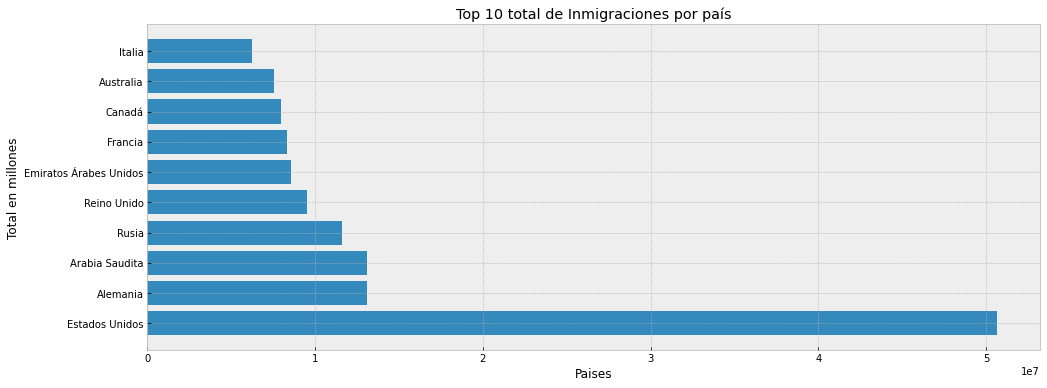

In [61]:
df_2019 = df_2019.sort_values(by=['Inmigrantes_total'], ascending=False)
top_10_df_2019 = df_2019.head(10)

fig, ax = plt.subplots(figsize=(16,6))
ax.barh(top_10_df_2019['Países'], top_10_df_2019['Inmigrantes_total'])
ax.set_title('Top 10 total de Inmigraciones por país')
ax.set_ylabel('Países')
ax.set_xlabel('Total en millones')